In [11]:
import pandas as pd
import numpy as np
from itertools import combinations

from sklearn.feature_selection import RFECV
from sklearn.base import clone
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import (cross_val_score, GridSearchCV, KFold, LeaveOneOut,
                                     ShuffleSplit, StratifiedKFold, train_test_split)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
import mne
from mne_connectivity.viz import plot_connectivity_circle
import seaborn as sns
import matplotlib.pyplot as plt

# Link:

https://drive.google.com/file/d/1H_WqssW0fi-D8VJ-IdM1Z_gPr8YIhZa9/view?usp=drive_link

# COGS 108 - Decoding Acute Stress in Laparoscopic Surgery: Insights from EEG Feature Analysis

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Parv Chordiya
- Chirag Amatya
- Michael Chu
- Tiffany Lee
- Derrick Dollesin

# Abstract

Stress is a pervasive phenomenon that significantly impacts performance and well-being, particularly in high-stakes environments like surgical training. This study investigates the relationship between Electroencephalography (EEG) features and acute stress during laparoscopic surgical training. Utilizing a dataset of EEG recordings from nine subjects engaged in laparoscopic tasks, we computed 1500 EEG features, including bandpower across different frequency bands and pairwise channel coherence. Our hypothesis posited that alpha bandpower and occipital region electrodes would be most indicative of stress.Subjects performed three laparoscopic tasks while their EEG data were recorded and subsequently rated their stress levels. EEG data preprocessing included bandpass filtering, artifact removal, and bandpower computation for delta, theta, alpha, beta, and gamma bands aswell as compuation of pairwise coherence for each of the electrode pairs. Our findings revealed a significant correlation between stress and EEG bandpower in the delta and gamma frequency bands, suggesting a widespread neural response to stress. Notably, gamma bandpower, associated with heightened alertness and cognitive processing, emerged as the most crucial marker. Additionally, pairwise channel coherence analysis indicated that coherence in the occipital region (theta and delta bands) and fronto-temporal cluster (gamma and beta bands) was related to stress levels. Contrary to our hypothesis, alpha bandpower did not demonstrate significant importance in stress prediction. These results highlight the potential of EEG-derived metrics, particularly gamma and delta bandpower, as neural markers for acute stress in laparoscopic surgical training. This study underscores the utility of EEG in stress monitoring and the development of interventions to enhance surgical education and patient care.

# Research Question

We want to investigate the relationship between EEG(Electroencephalography) and Stress. More specifically, we want to investigate the relative importances of all 1500 EEG features in our dataset to try and determine the most meaningful ones as they pertain to acute stress prediction in this Laproscopic surgery context. 

## Background and Prior Work

Stress is a ubiquitous phenomenon that pervades various aspects of human life, including the medical field. In the dynamic realm of surgical training, effective stress management significantly impacts performance and overall well-being (Arora et al., 2010; Chrouser et al., 2018; Tjønnås et al., 2022).

Laparoscopic surgery, a minimally invasive surgical technique, requires a unique set of skills and presents its own set of challenges. Surgeons must manipulate specialized instruments while viewing the surgical field on a screen, a task whose cognitive demands can constitute a stressor in themselves, particularly for those in training (Maimon et al., 2022).

Electroencephalography (EEG) provides a direct measure of brain activity, allowing for the investigation of how cognitive processes, such as stress, manifest in neural dynamics (Chang, 2022). Studies have commonly found associations between stress levels and EEG bandpower (Katmah et al., 2021; Lysiak, 2021; Zhang et al., 2022). Recent advances in EEG technology have enabled recording brain activity in more complex, real-world environments (Ko et al., 2017), opening the door to studying stress responses during surgical training procedures (Duru et al., 2013, Maddox et al., 2015). Previous research has successfully differentiated vigil and fatigue states in medical students (Pérez et al., 2021) as well as skill level of expert and novice surgeons (Manabe et al., 2023) through the classification of EEG patterns.

With the advent of artificial intelligence, machine learning techniques for classification of mental states using EEG data have emerged (for a review see Panicker & Gayathri, 2019), offering potential for real-time stress-monitoring. Developing interventions to manage stress in surgical training settings could ultimately pave the way to improve surgical education and patient care.

In our study, we aim to monitor neural indices of stress responses during surgical training tasks using mobile wireless EEG technology (Maimon et al., 2022). We hypothesize that specific patterns of EEG activity, such as frequency-specific band power, will correlate with self-reported stress levels, providing a potential neural marker for stress during laparoscopic surgery (Maddox et al., 2015; Manabe et al., 2023). Further, the implementation of a machine learning classifier using EEG features allows for the simultaneous utilization of numerous neuronal markers to achieve the highest accuracy results for stress detection.



**I am choosing to create a references cell at the bottom of the notebook because a lot of other sections also have references to other papers and I do not want to add the reference for those citations before I even cite them.


# Hypothesis


We hypothesize that out of all 1500 EEG features that are computed, the features involving Alpha bandpower will carry the most significance. Additionally, we hypothesize that features with electrodes placed in the occipital region of the skull will carry significant importance.


We believe that Alpha bandpower is going to carry a lot of information pertaining to stress levels because often times in most EEG related prediction topics, Alpha bandpower is often a good indicator regardless of task specificity. For example, alpha bandpower is prevelant during concentration, tiredness, depression, etc..

We also believe that the occipital region will be important because the Laproscopic exercise that the study subjects engaged in requires a lot of visual attention and in stressful moments we believe that eye strain or intenese focus will be visible in these occipital electrodes as they contain the visual processing centers of the brain.

# Data

## Data overview


This data set was collected in a pilot session of an ongoing project in the Swartz Center for Computational Neuroscience here at UCSD. It contains a total of 9 subjects worth of data, with each subject undergoing around 15-25 minutes of EEG recording whilst engaging in their respective tasks. 


### Laparoscopic training tasks and procedure

Each subject, upon arrival at the laboratory completed the DASS-21 stress questionnaire, and were fitted with an EEG. 

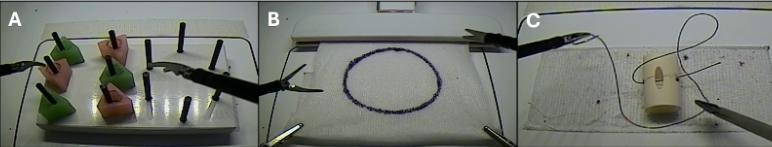


They then performed three of the five tasks of the Fundamentals for Laparoscopic Surgery (FLS): peg transfer, precision cutting, and intracorporeal suturing (Peters at al., 2004).

Each task was performed within a trainer box using laparoscopic surgical tools, with participants viewing their actions via a laparoscopic camera feed on a screen. A time limit of 10 minutes was set for each task. If a participant completed a task in under 5 minutes, they repeated the task with the instruction to be more precise and faster this time, to ensure a minimum of 5 minutes of EEG data per task.
The peg transfer task involved moving six small pegs from one side to another using laparoscopic pliers, with each peg being transferred from one hand to the other. The precision cutting task required participants to cut a preprinted circle from a piece of gauze using a pair of pliers and scissors. The intracorporeal suturing task involved placing a suture through a penrose drain and then tying three throws of a knot intracorporeally, using a needle driver and a pair of pliers.

Following each task, participants reviewed the recording of their task performance and rated their stress level during the task on a scale from 0 to 10 using a slider on a separate device. This provided post-hoc stress ratings for each moment of task performance.

### EEG preprocessing and analysis

EEG data was recorded using a wireless 24-channel Smarting EEG system (mBraintrain) with a sampling rate of 500Hz. All electrode impedances were kept below 20 kW. An online bandpass filter between 0.016Hz and 250Hz was applied.

Offline data processing was performed using Matlab (R2021a), EEGLab (Delorme & Makeig, 2004) and custom python scripts. The EEG data were filtered with a bandpass filter between 1Hz and 50Hz and rereferenced to the common average. The EEGLab ASR algorithm was applied to remove flatline channels, low-frequency drifts, noisy channels and short-time bursts. AMICA was applied to extract components which were automatically labeled using ICLabel (Pion-Tonachini et al., 2019) as implemented in EEGLab. Components with an artifact probability of 80% or higher were removed. The resulting preprocessed data were used for all further analyses.

To calculate bandpower over time, the data was segmented into 10s windows and applied a Short-Time Fourier Transform. They averaged the power across frequencies for the delta (0.5-4 Hz), theta (4-8 Hz), alpha (8-13 Hz), beta (14-30 Hz), and gamma (30-50 Hz) frequency bands for each channel and standardized the resulting features by z-scoring. These bandpower estimates were used to compute separate linear mixed models for each frequency band and channel, yielding 120 mixed effects models (5 frequency bands * 24 channels). In each model we used stress as the dependent variable and modeled standardized bandpower as a fixed effect and individual participant variance as a random effect.

In addition, they also analyzed pairwise channel coherence. Pairwise channel coherence was calculated as the magnitude-squared coherence over segments as follows:

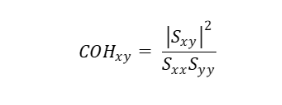

where S represents the cross-spectral density between channels x and y, and Sxx and Syy are the PSD values at channels x and y, respectively. Again, we computed separate linear mixed models for each frequency band and channel combination, yielding 1380 mixed effects models (5 frequency bands * 276 channel combinations). Similar to the other mixed models, we used stress as the dependent variable and modeled standardized coherence as a fixed effect and individual participant variance as a random effect.


### Data Structure

After all of the data wrangling below, the data is structured with each row being a 10 second epoch from a respective subject(indicated by index label), and each row contains 1500 columns that each represent a feature(bandpower or coherence) that was computed offline by the SCCN and came with the data.



# EEG electrode placement:

In this dataset we have 24 EEG channels that are placed according to the figure below.

The M1 and M2 electrodes are placed right behind the ear so the plot has a hard time displaying their position**

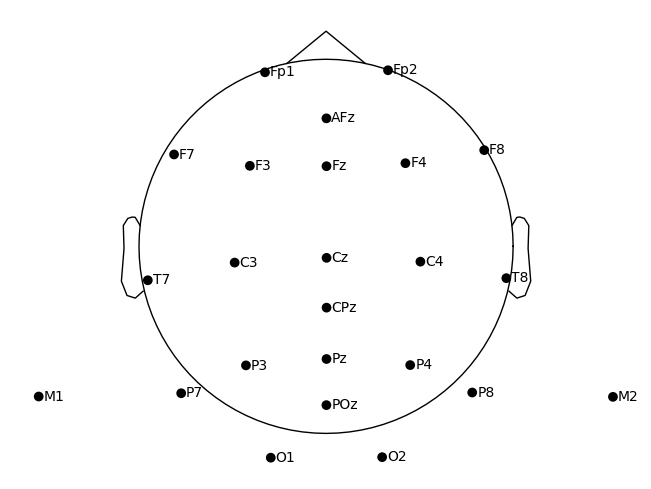

In [12]:
# Define your channels
channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 
            'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'M1', 
            'M2', 'AFz', 'CPz', 'POz']

# Create a standard montage
montage = mne.channels.make_standard_montage('standard_1020')

# Extract positions of the specified channels
selected_pos = {ch: montage.get_positions()['ch_pos'][ch] for ch in channels}

# Create custom montage
custom_montage = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')

# Create an info structure with these channels
info = mne.create_info(ch_names=channels, sfreq=250, ch_types='eeg')

# Set the montage to the info object
info.set_montage(custom_montage)

# Plot the montage
custom_montage.plot(kind='topomap', show_names=True)

# Optionally, to see the plot in an interactive way
plt.show()


## Dataset #1 (use name instead of number here)

In [13]:

X_files = ['Data/bandpower_delta.csv', 'Data/bandpower_theta.csv', 'Data/bandpower_alpha.csv', 'Data/bandpower_beta.csv', 'Data/bandpower_gamma.csv', 'Data/coherence_delta.csv', 'Data/coherence_theta.csv', 'Data/coherence_alpha.csv', 'Data/coherence_beta.csv', 'Data/coherence_gamma.csv']
Y_files = 'Data/stress_raw.csv'

In [14]:
#EEG features
X_dfs = [pd.read_csv(file) for file in X_files]


Y_dfs = pd.read_csv(Y_files)
Y_dfs = pd.DataFrame(Y_dfs)
Y_non_binary = Y_dfs
stressThreshold = 6.
Y_dfs = (Y_dfs >= stressThreshold).astype(int)

num_rows = len(X_dfs[0])
combined_rows = [pd.concat([df.iloc[i] for df in X_dfs], ignore_index=True) for i in range(num_rows)]


X_dfs = pd.concat(combined_rows, axis=1).transpose()

In [15]:
value_counts = Y_dfs.value_counts()

num_zeros = value_counts.get(0, 0)
num_ones = value_counts.get(1, 0)

print(f"Number of 0s(No stress): {num_zeros}")
print(f"Number of 1s(Stress): {num_ones}")

Number of 0s(No stress): 581
Number of 1s(Stress): 580


In [16]:
bp = ['delta_', 'theta_', 'alpha_', ' beta_', 'gamma_']
column_labels_bandpower = ['Fp1',	'Fp2',	'F3',	'F4',	'C3',	'C4',	'P3',	'P4',	'O1',	'O2',	'F7',	'F8',	'T7',	'T8',	'P7',	'P8',	'Fz',	'Cz',	'Pz',	'M1',	'M2',	'AFz',	'CPz',	'POz']
column_labels_bandpower_final = []
for x in range(0,5):
    for name in column_labels_bandpower:
        column_labels_bandpower_final.append(bp[x] + name)

bp = ['delta_', 'theta_', 'alpha_', ' beta_', 'gamma_']
column_labels_coherence = ['Fp1-Fp2','Fp1-F3','Fp1-F4','Fp1-C3','Fp1-C4','Fp1-P3','Fp1-P4','Fp1-O1','Fp1-O2','Fp1-F7','Fp1-F8','Fp1-T7','Fp1-T8','Fp1-P7','Fp1-P8','Fp1-Fz','Fp1-Cz','Fp1-Pz','Fp1-M1','Fp1-M2','Fp1-AFz','Fp1-CPz','Fp1-POz','Fp2-F3','Fp2-F4','Fp2-C3','Fp2-C4','Fp2-P3','Fp2-P4','Fp2-O1','Fp2-O2','Fp2-F7','Fp2-F8','Fp2-T7','Fp2-T8','Fp2-P7','Fp2-P8','Fp2-Fz','Fp2-Cz','Fp2-Pz','Fp2-M1','Fp2-M2','Fp2-AFz','Fp2-CPz','Fp2-POz','F3-F4','F3-C3','F3-C4','F3-P3','F3-P4','F3-O1','F3-O2','F3-F7','F3-F8','F3-T7','F3-T8','F3-P7','F3-P8','F3-Fz','F3-Cz','F3-Pz','F3-M1','F3-M2','F3-AFz','F3-CPz','F3-POz','F4-C3','F4-C4','F4-P3','F4-P4','F4-O1','F4-O2','F4-F7','F4-F8','F4-T7','F4-T8','F4-P7','F4-P8','F4-Fz','F4-Cz','F4-Pz','F4-M1','F4-M2','F4-AFz','F4-CPz','F4-POz','C3-C4','C3-P3','C3-P4','C3-O1','C3-O2','C3-F7','C3-F8','C3-T7','C3-T8','C3-P7','C3-P8','C3-Fz','C3-Cz','C3-Pz','C3-M1','C3-M2','C3-AFz','C3-CPz','C3-POz','C4-P3','C4-P4','C4-O1','C4-O2','C4-F7','C4-F8','C4-T7','C4-T8','C4-P7','C4-P8','C4-Fz','C4-Cz','C4-Pz','C4-M1','C4-M2','C4-AFz','C4-CPz','C4-POz','P3-P4','P3-O1','P3-O2','P3-F7','P3-F8','P3-T7','P3-T8','P3-P7','P3-P8','P3-Fz','P3-Cz','P3-Pz','P3-M1','P3-M2','P3-AFz','P3-CPz','P3-POz','P4-O1','P4-O2','P4-F7','P4-F8','P4-T7','P4-T8','P4-P7','P4-P8','P4-Fz','P4-Cz','P4-Pz','P4-M1','P4-M2','P4-AFz','P4-CPz','P4-POz','O1-O2','O1-F7','O1-F8','O1-T7','O1-T8','O1-P7','O1-P8','O1-Fz','O1-Cz','O1-Pz','O1-M1','O1-M2','O1-AFz','O1-CPz','O1-POz','O2-F7','O2-F8','O2-T7','O2-T8','O2-P7','O2-P8','O2-Fz','O2-Cz','O2-Pz','O2-M1','O2-M2','O2-AFz','O2-CPz','O2-POz','F7-F8','F7-T7','F7-T8','F7-P7','F7-P8','F7-Fz','F7-Cz','F7-Pz','F7-M1','F7-M2','F7-AFz','F7-CPz','F7-POz','F8-T7','F8-T8','F8-P7','F8-P8','F8-Fz','F8-Cz','F8-Pz','F8-M1','F8-M2','F8-AFz','F8-CPz','F8-POz','T7-T8','T7-P7','T7-P8','T7-Fz','T7-Cz','T7-Pz','T7-M1','T7-M2','T7-AFz','T7-CPz','T7-POz','T8-P7','T8-P8','T8-Fz','T8-Cz','T8-Pz','T8-M1','T8-M2','T8-AFz','T8-CPz','T8-POz','P7-P8','P7-Fz','P7-Cz','P7-Pz','P7-M1','P7-M2','P7-AFz','P7-CPz','P7-POz','P8-Fz','P8-Cz','P8-Pz','P8-M1','P8-M2','P8-AFz','P8-CPz','P8-POz','Fz-Cz','Fz-Pz','Fz-M1','Fz-M2','Fz-AFz','Fz-CPz','Fz-POz','Cz-Pz','Cz-M1','Cz-M2','Cz-AFz','Cz-CPz','Cz-POz','Pz-M1','Pz-M2','Pz-AFz','Pz-CPz','Pz-POz','M1-M2','M1-AFz','M1-CPz','M1-POz','M2-AFz','M2-CPz','M2-POz','AFz-CPz','AFz-POz','CPz-POz']
column_labels_coherence_final = []
for x in range(0,5):
    for name in column_labels_coherence:
        column_labels_coherence_final.append(bp[x] + name)

column_labels = column_labels_bandpower_final+column_labels_coherence_final
X_dfs.columns = column_labels

ranges = [
    (1, 82),
    (83, 167),
    (168, 320),
    (321, 468),
    (469, 585),
    (586, 723),
    (724, 872),
    (873, 1004),
    (1005, 1161)
]

subjects = []

for i, (start, end) in enumerate(ranges, start=1):
    subjects.extend([f'Subject{i}'] * (end - start + 1))



X_dfs.index = subjects
Y_dfs.index = subjects
Y_non_binary.index = subjects

X_dfs_bandpower = X_dfs.iloc[:, :120]
X_dfs_coherence = X_dfs.iloc[:, 120:]

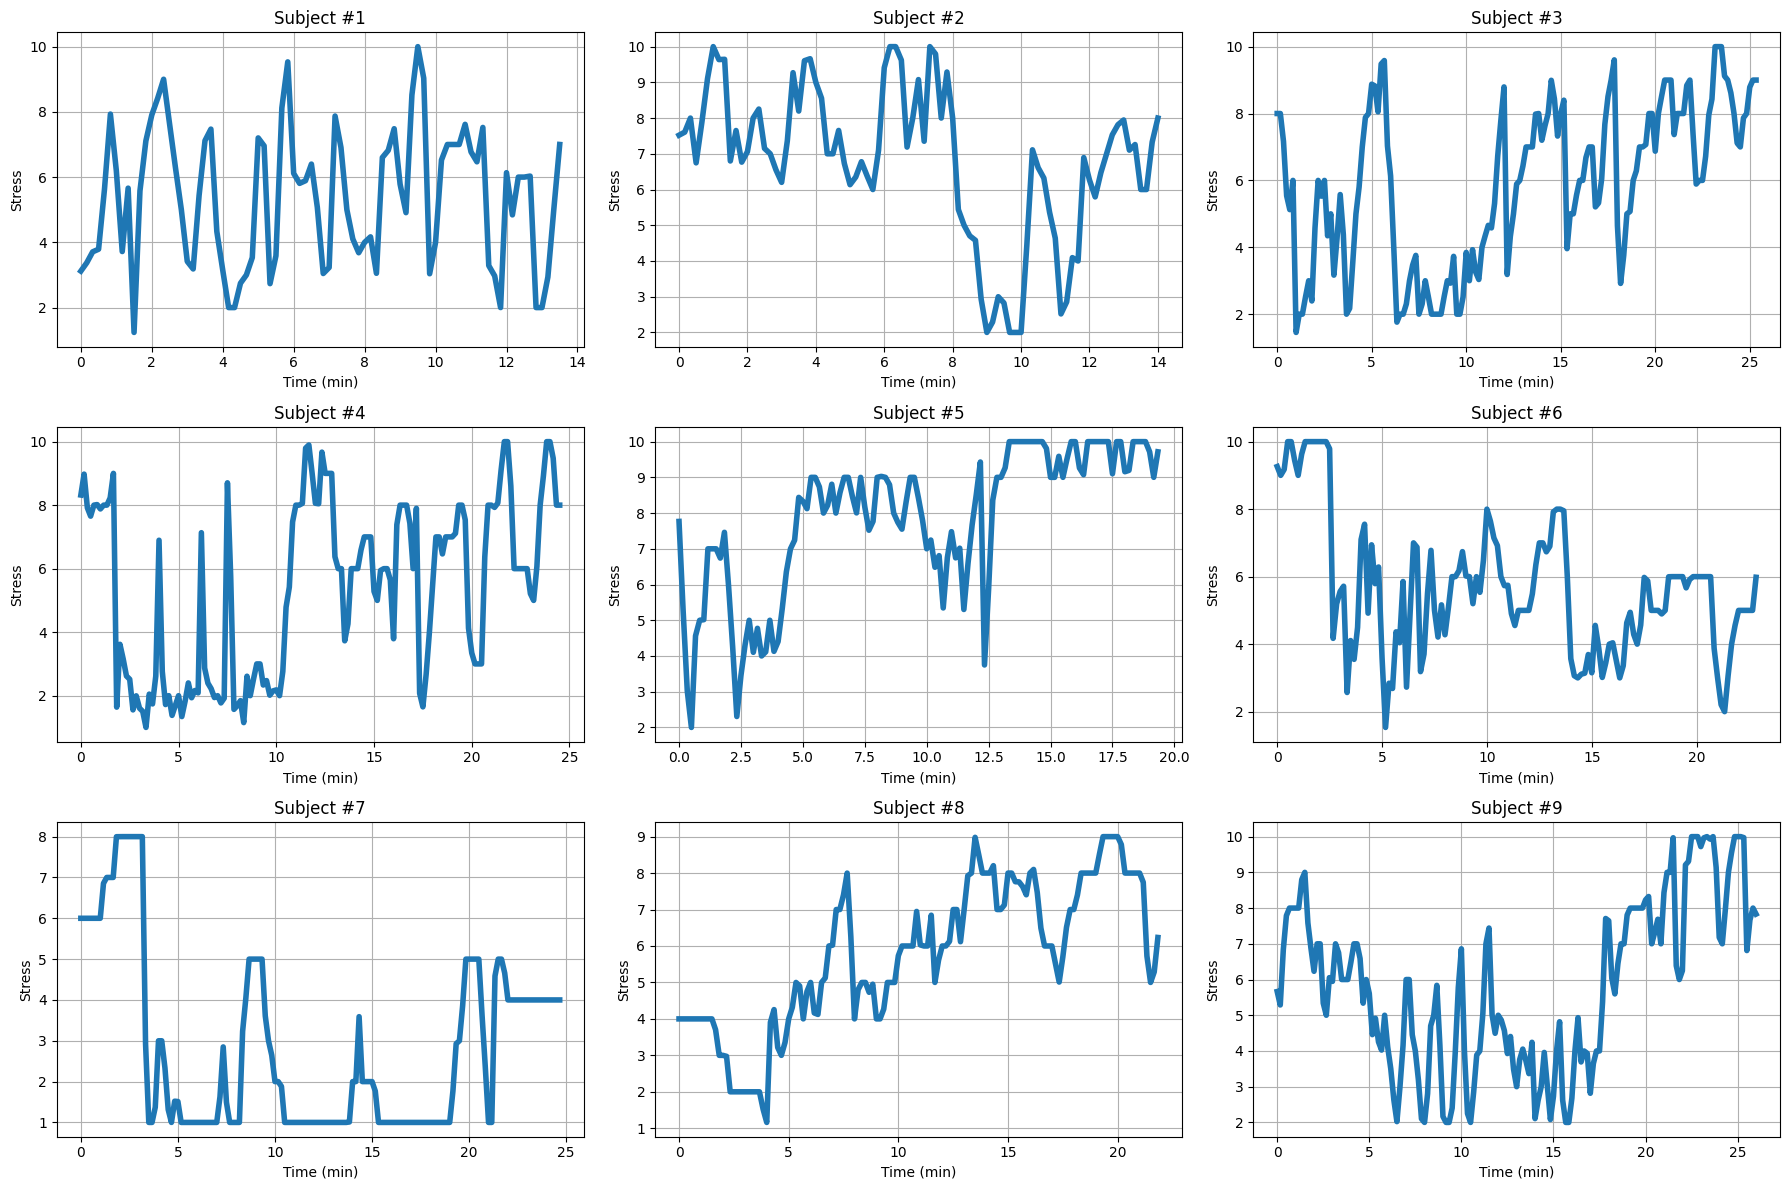

In [17]:
nrows, ncols = 3, 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
axes = axes.flatten()  

for i in range(1, 10):
    subject = f'Subject{i}'
    values = Y_non_binary.loc[subject].values.flatten() 

    num_points = len(values)

    minutes = np.arange(0, num_points * 10, 10) / 60  

    ax = axes[i-1]
    ax.plot(minutes, values, linestyle='-', linewidth=4)  
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Stress')
    ax.set_title(f'Subject #{i}')
    ax.grid(True)

plt.tight_layout()
plt.show()

^I'll add captions for all the graphs and everything but this graph basically shows the self rated stress levels of each subject as they underwent the laproscopic procedures.

In [18]:
X_dfs

,delta_Fp1,delta_Fp2,delta_F3,delta_F4,delta_C3,delta_C4,delta_P3,delta_P4,delta_O1,delta_O2,...,gamma_M1-M2,gamma_M1-AFz,gamma_M1-CPz,gamma_M1-POz,gamma_M2-AFz,gamma_M2-CPz,gamma_M2-POz,gamma_AFz-CPz,gamma_AFz-POz,gamma_CPz-POz
Subject1,0.394307,1.599747,2.726823,-2.992742,-2.372566,1.148198,2.393122,0.155264,5.803184,4.261109,...,0.092195,0.084965,0.154651,0.128792,0.188102,0.160442,0.159875,0.482598,0.663322,0.894273
Subject1,-0.149713,5.966694,3.829170,1.239717,-2.367881,-0.490503,0.622708,0.535046,4.884100,4.777934,...,0.117915,0.089701,0.126930,0.109031,0.117394,0.187809,0.150613,0.364265,0.456044,0.884439
Subject1,-3.183797,4.650560,-0.602012,-0.150686,-0.804464,-0.606826,-2.568157,-2.674325,4.049312,2.593247,...,0.099517,0.129662,0.315088,0.245590,0.149354,0.070111,0.098800,0.424306,0.597513,0.901940
Subject1,-2.110095,9.834378,0.788589,0.014000,0.151777,3.278379,-0.690953,-2.195723,5.784860,5.890014,...,0.066678,0.097632,0.236255,0.191423,0.166667,0.110135,0.111779,0.388794,0.583179,0.871656
Subject1,-3.829407,5.750818,1.270700,2.094251,-2.651974,-0.266506,0.423327,-2.014899,7.122095,4.692419,...,0.102767,0.118291,0.209949,0.158469,0.133713,0.125637,0.089462,0.445359,0.592426,0.912373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Subject9,-4.781852,-3.407849,0.133704,-1.433123,-5.741494,-6.162795,-4.777654,-4.465562,0.620000,-0.614368,...,0.144903,0.354411,0.195450,0.218651,0.197836,0.099939,0.149136,0.196894,0.579481,0.152261
Subject9,-4.427387,-4.001543,1.630305,1.622165,-0.689762,-5.283847,-0.437625,-2.269518,-0.708222,-0.696294,...,0.117010,0.283885,0.172069,0.287374,0.451898,0.263065,0.397970,0.297038,0.635434,0.534678
Subject9,-2.527998,-3.853688,-1.681693,-1.859086,-7.623779,-5.638700,-3.468030,-0.279179,-1.399777,-0.285489,...,0.154552,0.183583,0.097458,0.220496,0.429276,0.139780,0.274604,0.179926,0.461987,0.419484
Subject9,-3.423811,-2.380746,0.490020,-0.515831,-6.459564,-5.191147,-1.723863,-2.384309,-0.699063,-0.756964,...,0.216614,0.284334,0.167149,0.235419,0.258454,0.200145,0.163477,0.222176,0.529587,0.170705


In [19]:
Y_dfs

,4
Subject1,0
Subject1,0
Subject1,0
Subject1,0
Subject1,0
...,...
Subject9,1
Subject9,1
Subject9,1
Subject9,1


# Results

## **Exploratory Data Analysis**

Our goal is to find the most important EEG features in determining stress. There are multiple ways to do this but we are going to be using a correlation anaylsis between the features of X_dfs and the stress labels Y_dfs and also Recursive Feature Elimination with an SVM and XGBoost esimator to try and find the most important features to decode stress in EEG contexts.

## Okay lets start our correlation anaylsis!

We are going to first run this analysis on our bandpower data. We start by calculating the correlation coefficient between each EEG bandpower feature and the binary stress labels.

In [20]:
Y_dfs = Y_dfs.squeeze()  

if X_dfs_bandpower.shape[0] != Y_dfs.shape[0]:
    raise ValueError("The number of rows in X_dfs and Y_dfs must be the same")

X_dfs_bandpower = X_dfs_bandpower.apply(pd.to_numeric)

Y_dfs = pd.to_numeric(Y_dfs)

# Calculate the correlation coefficient for each feature with respect to the binary label
correlations = {}
for column in X_dfs_bandpower.columns:
    # Calculate the correlation matrix
    corr_matrix = np.corrcoef(X_dfs_bandpower[column], Y_dfs)
    correlations[column] = corr_matrix[0, 1]

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

correlation_df['AbsoluteCorrelation'] = correlation_df['Correlation'].abs()

correlation_df['Feature'] = correlation_df['Feature'].str.strip()

correlation_df = correlation_df.sort_values(by='AbsoluteCorrelation', ascending=False)
print(correlation_df[:25])



       Feature  Correlation  AbsoluteCorrelation
99    gamma_F4     0.376755             0.376755
114   gamma_Pz     0.375059             0.375059
118  gamma_CPz     0.369767             0.369767
112   gamma_Fz     0.341706             0.341706
98    gamma_F3     0.338843             0.338843
9     delta_O2     0.332758             0.332758
106   gamma_F7     0.331659             0.331659
103   gamma_P4     0.330597             0.330597
100   gamma_C3     0.319176             0.319176
8     delta_O1     0.318554             0.318554
101   gamma_C4     0.316836             0.316836
6     delta_P3     0.313813             0.313813
107   gamma_F8     0.311360             0.311360
5     delta_C4     0.310084             0.310084
75     beta_F4     0.305050             0.305050
10    delta_F7     0.302631             0.302631
7     delta_P4     0.302361             0.302361
94    beta_CPz     0.300912             0.300912
90     beta_Pz     0.299393             0.299393
117  gamma_AFz     0

Above are the 25 bandpower features with the highest correlation.

### Note:
While a max of r = 0.377 doesn't seem very signficant, it is important to remember that there are 1161 total pairs of data. 

If we scale the r coefficient into a t distribution value using the formula below, we get 13.857 which is more than significant and when converted to a p-value is significantly less than <.000001

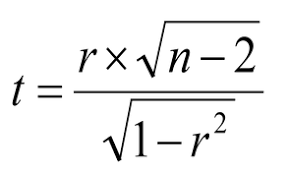

In [21]:
correlation_df = correlation_df.drop(columns = ['Correlation'])

Lets make a heatmap to display all of this data.

We are going to apply a correlation threshold of 0.25 to signify a "high" or "significant" correlation value. This 0.25 is pretty arbritary of a threshold and if going by a 0.05 alpha value, the threshold would be much lower, but we felt that 0.25 is good threshold to filter out more meaningful features in an already noisy EEG enviroment.

In [22]:
#Split up correlation data frame into individual bandpowers in order to make headmap easier


correlation_df = correlation_df.sort_values(by='Feature', ascending=True)


correlation_df_alpha = correlation_df[:24].copy()
correlation_df_alpha.columns = ['Feature', 'AbsoluteCorrelation_alpha']

correlation_df_beta = correlation_df[24:48].copy()
correlation_df_beta.columns = ['Feature', 'AbsoluteCorrelation_beta']

correlation_df_delta = correlation_df[48:72].copy()
correlation_df_delta.columns = ['Feature', 'AbsoluteCorrelation_delta']

correlation_df_gamma = correlation_df[72:96].copy()
correlation_df_gamma.columns = ['Feature', 'AbsoluteCorrelation_gamma']

correlation_df_theta = correlation_df[96:120].copy()
correlation_df_theta.columns = ['Feature', 'AbsoluteCorrelation_theta']

correlation_df_alpha['Feature'] = correlation_df_alpha['Feature'].str.replace('alpha_', '')
correlation_df_beta['Feature'] = correlation_df_beta['Feature'].str.replace('beta_', '')
correlation_df_delta['Feature'] = correlation_df_delta['Feature'].str.replace('delta_', '')
correlation_df_gamma['Feature'] = correlation_df_gamma['Feature'].str.replace('gamma_', '')
correlation_df_theta['Feature'] = correlation_df_theta['Feature'].str.replace('theta_', '')


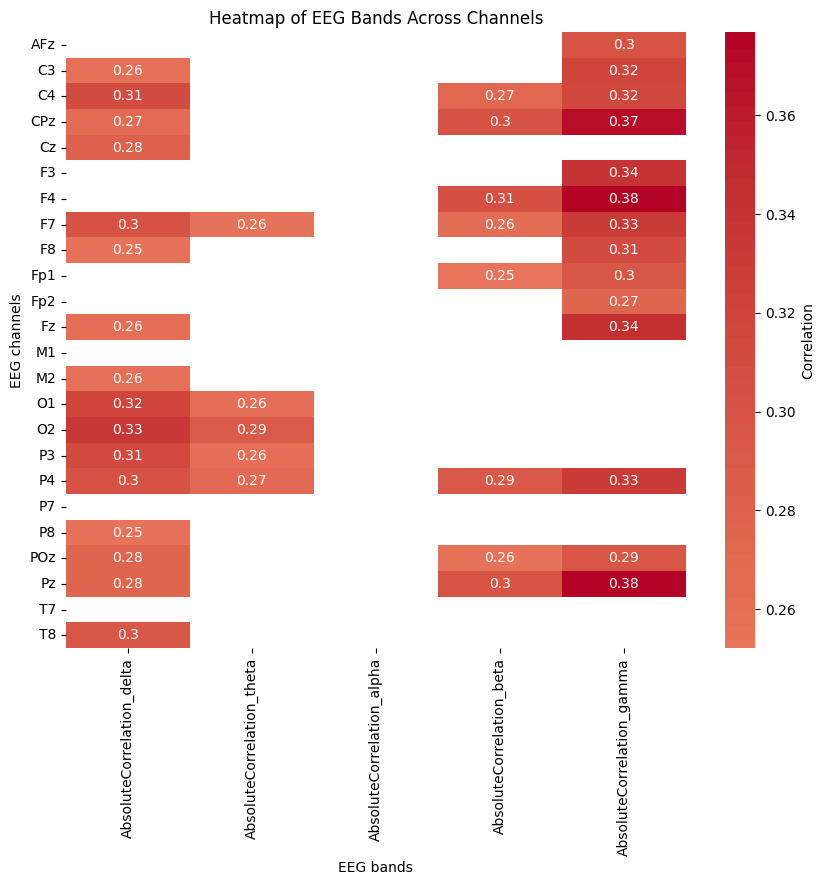

In [23]:
merged_df = correlation_df_delta.merge(correlation_df_theta, on='Feature', how='outer') \
                                .merge(correlation_df_alpha, on='Feature', how='outer') \
                                .merge(correlation_df_beta, on='Feature', how='outer') \
                                .merge(correlation_df_gamma, on='Feature', how='outer')

merged_df.set_index('Feature', inplace=True)

mask = merged_df < 0.25

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df, annot=True, cmap='coolwarm', center=0, mask=mask, cbar_kws={'label': 'Correlation'})
plt.xlabel('EEG bands')
plt.ylabel('EEG channels')
plt.title('Heatmap of EEG Bands Across Channels')
plt.show()

## Heatmap Analysis:

As you can see, there is a lot of Delta and Gamma bandpower features that are highly correlated with **Delta** having 16 features with an r above 0.25 and **Gamma** having 14. **Alpha** seems to completely unimportant according to the correlation analyis and **Theta** and **Beta** have some important features


Additionally if you will recall from the data section, the electrode features are placed on the scalp like the figure below:

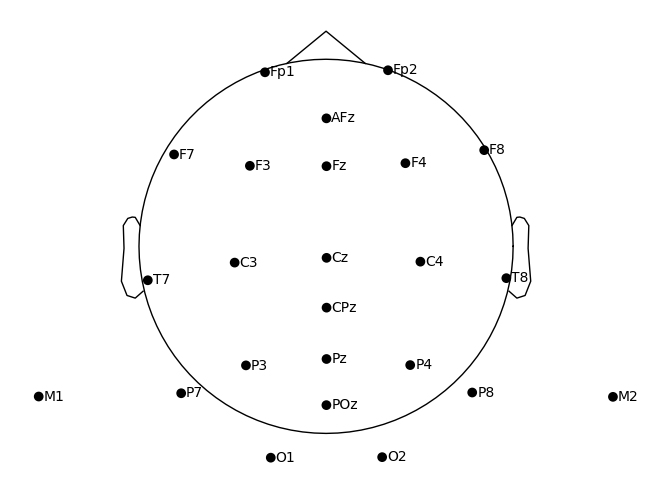


**Delta** has significant features distributed all over the skull but **Gamma** is interesting in that it has a lot of features pertaining to the frontal lobe. It is possible that the frontal lobe exhibis very high frequency activity while under acute stress.

**Theta** is also interesting because most of its features were centered in Occipital region of the skull, which houses the visual processesing centers of the brain.


Below is an example visually showing how correlated some bandpower features are to the stress ratings.

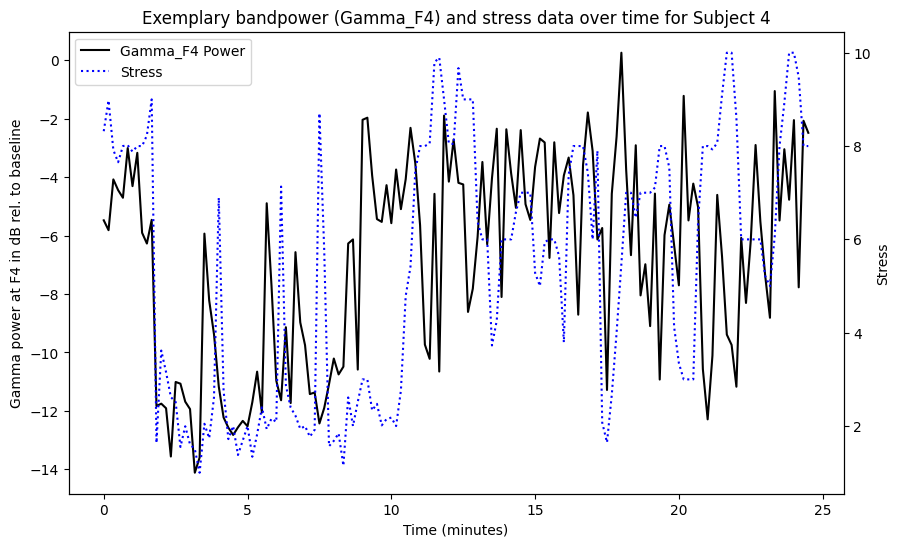

In [24]:
sub = 'Subject4'

valuesStress = Y_non_binary.loc[sub].values.flatten() 
valuesEEG = X_dfs['gamma_F4'].loc[sub].values.flatten()

num_points = len(valuesStress)

minutes = np.arange(0, num_points * 10, 10) / 60  
dataStress = pd.DataFrame({'Minutes': minutes, 'Values': valuesStress})
dataStress.set_index('Minutes', inplace=True)

dataEEG = pd.DataFrame({'Minutes': minutes, 'Values': valuesEEG})
dataEEG.set_index('Minutes', inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the EEG data
line1, = ax1.plot(dataEEG.index, dataEEG['Values'], marker='', linestyle='-',  color='black', label='Gamma_F4 Power')
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel('Gamma power at F4 in dB rel. to baseline')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

# Plot the stress data
line2, = ax2.plot(dataStress.index, dataStress['Values'], marker='', linestyle=':',  color='blue', label='Stress')
ax2.set_ylabel('Stress')
ax2.tick_params(axis='y')

# Add a legend
lines = [line1, line2]
ax1.legend(lines, [l.get_label() for l in lines], loc='upper left')

plt.title('Exemplary bandpower (Gamma_F4) and stress data over time for Subject 4')

plt.show()


We now are going to run the same correlation analysis on our coherence data!! We will again start by calculating the correlation coefficient between each EEG coherence feature and the binary stress labels.

In [25]:
Y_dfs = Y_dfs.squeeze()  

if X_dfs_coherence.shape[0] != Y_dfs.shape[0]:
    raise ValueError("The number of rows in X_dfs and Y_dfs must be the same")

X_dfs_coherence = X_dfs_coherence.apply(pd.to_numeric)

Y_dfs = pd.to_numeric(Y_dfs)

# Calculate the correlation coefficient for each feature with respect to the binary label
correlations = {}
for column in X_dfs_coherence.columns:
    # Calculate the correlation matrix
    corr_matrix = np.corrcoef(X_dfs_coherence[column], Y_dfs)
    correlations[column] = corr_matrix[0, 1]

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

correlation_df['AbsoluteCorrelation'] = correlation_df['Correlation'].abs()
correlation_df['Feature'] = correlation_df['Feature'].str.strip()

correlation_df = correlation_df.sort_values(by='AbsoluteCorrelation', ascending=False)

print(correlation_df[:40])


            Feature  Correlation  AbsoluteCorrelation
1373   gamma_M1-POz     0.342509             0.342509
859     beta_Fp2-F7    -0.320274             0.320274
1182    gamma_F4-Fz    -0.315427             0.315427
232     delta_P7-Fz    -0.311181             0.311181
872    beta_Fp2-POz    -0.307054             0.307054
1284    gamma_O2-M1     0.305969             0.305969
526     theta_Fz-M1    -0.302738             0.302738
870    beta_Fp2-AFz    -0.302437             0.302437
1135   gamma_Fp2-F7    -0.302056             0.302056
1316    gamma_T7-P8     0.301311             0.301311
161     delta_O1-P7    -0.299658             0.299658
1311   gamma_F8-AFz    -0.298760             0.298760
865     beta_Fp2-Fz    -0.298647             0.298647
177     delta_O2-Fz    -0.297877             0.297877
1141   gamma_Fp2-Fz    -0.295578             0.295578
163     delta_O1-Fz    -0.294242             0.294242
112     delta_C4-T8     0.291834             0.291834
235     delta_P7-M1    -0.29

Above are the 25 bandpower features with the highest correlation.

Do take note that there are many negative correlations and when compared to the corrlations from bandpower, the r coefficients are not as high. This does suggest that the coherence features have a weaker overall correlation with stress. The negative correlation values also make sense as a very low correlation can carry information about EEG desynchronization and a very positive coherence value can carry information about strong EEG synchronization across features, and since both ranges of coherence values carry valid information that pertains to stress or changed brain states, there will be both positive and negative correlations.

In [26]:
correlation_df = correlation_df.sort_values(by='Feature')

correlation_df_alpha_coherence = correlation_df[:276]
correlation_df_beta_coherence = correlation_df[276:552]
correlation_df_delta_coherence = correlation_df[552:828]
correlation_df_gamma_coherence = correlation_df[828:1104]
correlation_df_theta_coherence = correlation_df[1104:1380]



In [ ]:
def connectivityCircle(df, bp):


    df['Electrode1'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[0])
    df['Electrode2'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[1])

   

    # List of unique electrodes
    electrodes = sorted(list(set(df['Electrode1']).union(set(df['Electrode2']))))


    n = len(electrodes)
    con_matrix = np.zeros((n, n))

    electrode_indices = {electrode: idx for idx, electrode in enumerate(electrodes)}


    # Fill the connectivity matrix with coherence values, applying the threshold
    threshold = 0.25
    for _, row in df.iterrows():
        idx1 = electrode_indices[row['Electrode1']]
        idx2 = electrode_indices[row['Electrode2']]
        coherence_value = row['Correlation']
        if abs(coherence_value) > threshold:
            con_matrix[idx1, idx2] = coherence_value
            con_matrix[idx2, idx1] = coherence_value  
        else:
            con_matrix[idx1, idx2] = np.nan
            con_matrix[idx2, idx1] = np.nan  # Ensure below-threshold values are set to NaN


    montage = mne.channels.make_standard_montage('standard_1020')

    standard_pos = montage.get_positions()['ch_pos']

    filtered_pos = {elec: standard_pos[elec] for elec in electrodes if elec in standard_pos}

    node_order = list(filtered_pos.keys())
    node_angles = mne.viz.circular_layout(node_order, node_order, start_pos=90,
                                        group_boundaries=[0, len(node_order) // 2])

    # Plot connectivity circle, ignoring NaN values
    fig, ax = plot_connectivity_circle(con_matrix, node_names=node_order, n_lines=272, 
                                    node_angles=node_angles, title='Brain Connectivity Map'+ ' ' + bp + ' Coherence', 
                                    colormap='coolwarm', vmin=-0.5, vmax=0.5, colorbar = True)

    plt.show()

Lets make a brain connectivity map to display all of this data!!

Each line represnts a coherence pair that has a high correlation coefficient. We used the same threshold of 0.25 to filter out significant correlations.

### Note:

In the plot, the blue lines represent negative correlation, meaning, the electrode pair has a negative correlation with stress and thus means that the two electrodes in the pair are showing desynchronization with one another, the a red line meaning vice versa.

/tmp/ipykernel_2608/1207901359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrode1'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[0])
/tmp/ipykernel_2608/1207901359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrode2'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[1])


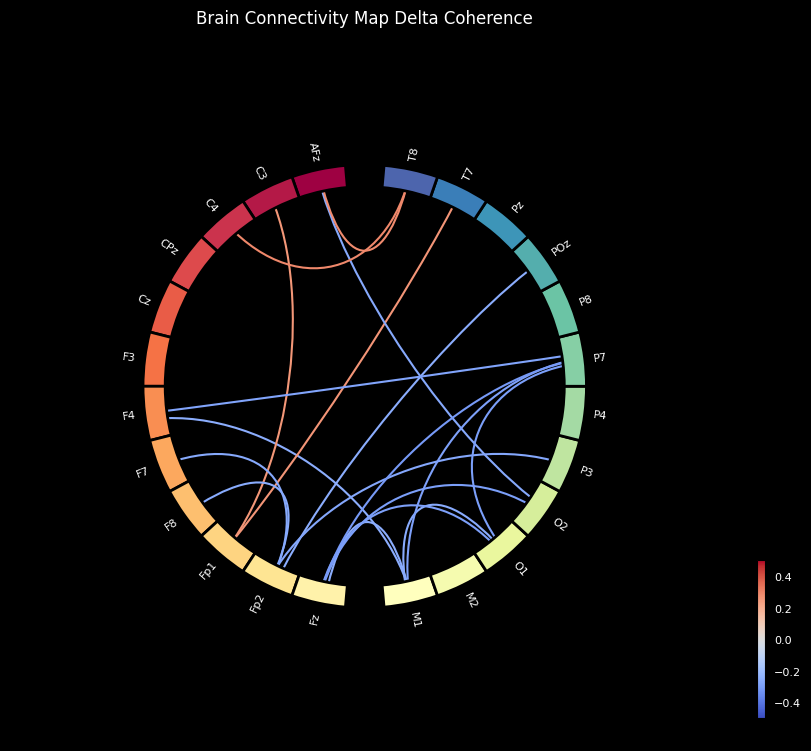

/tmp/ipykernel_2608/1207901359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrode1'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[0])
/tmp/ipykernel_2608/1207901359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrode2'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[1])


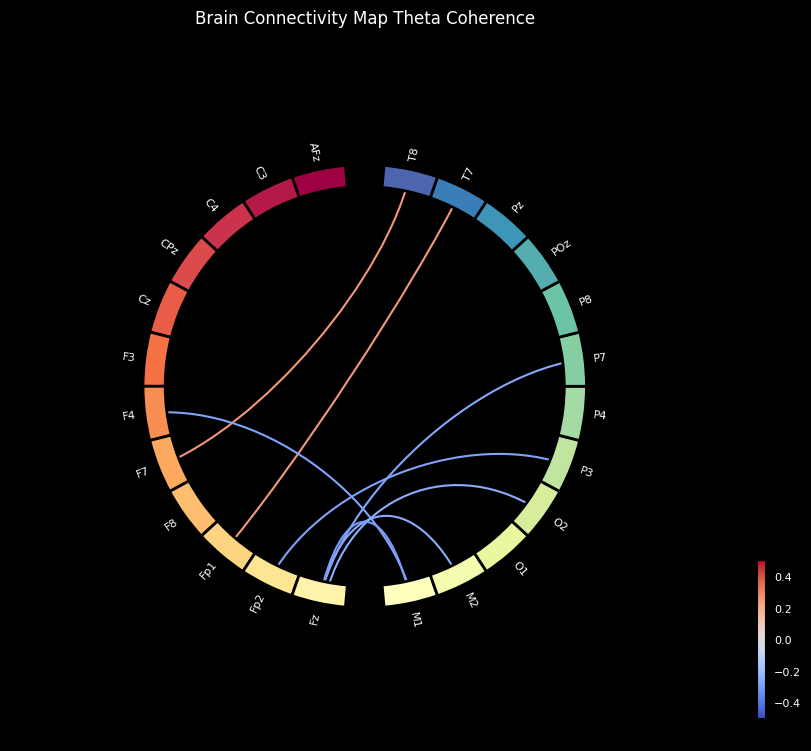

/tmp/ipykernel_2608/1207901359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrode1'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[0])
/tmp/ipykernel_2608/1207901359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrode2'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[1])


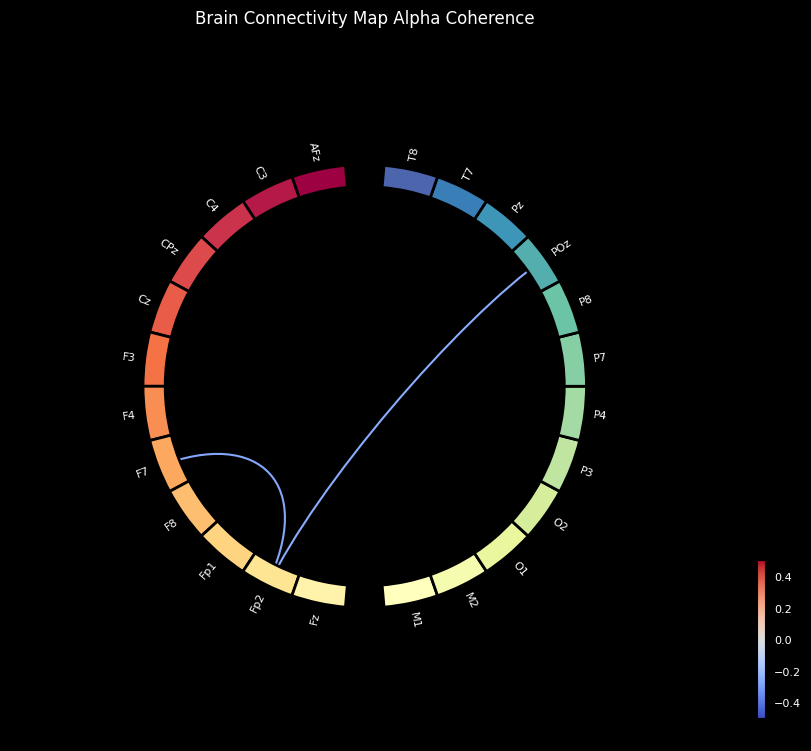

/tmp/ipykernel_2608/1207901359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrode1'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[0])
/tmp/ipykernel_2608/1207901359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrode2'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[1])


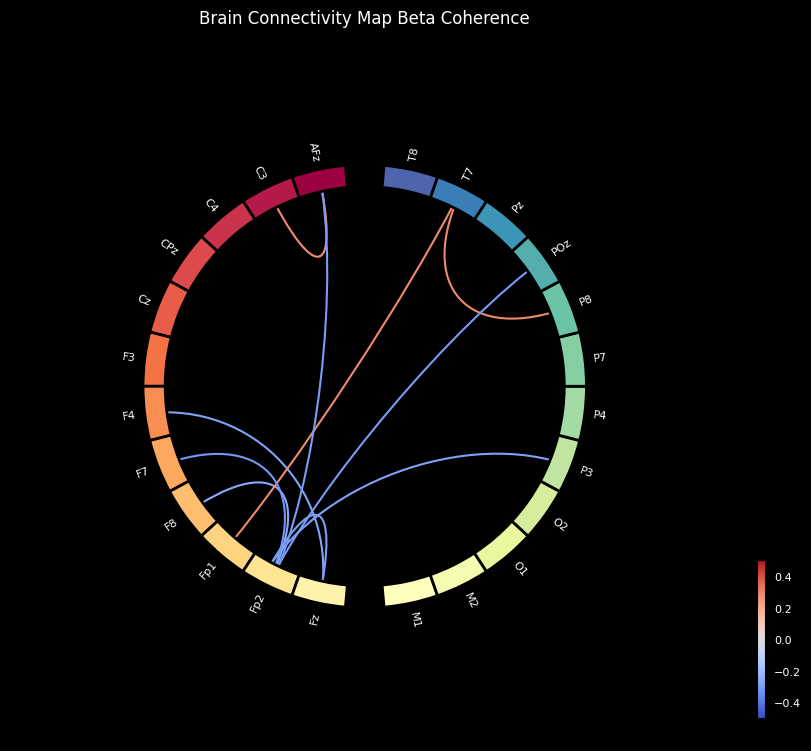

/tmp/ipykernel_2608/1207901359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrode1'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[0])
/tmp/ipykernel_2608/1207901359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Electrode2'] = df['Feature'].apply(lambda x: x.split('_')[1].split('-')[1])


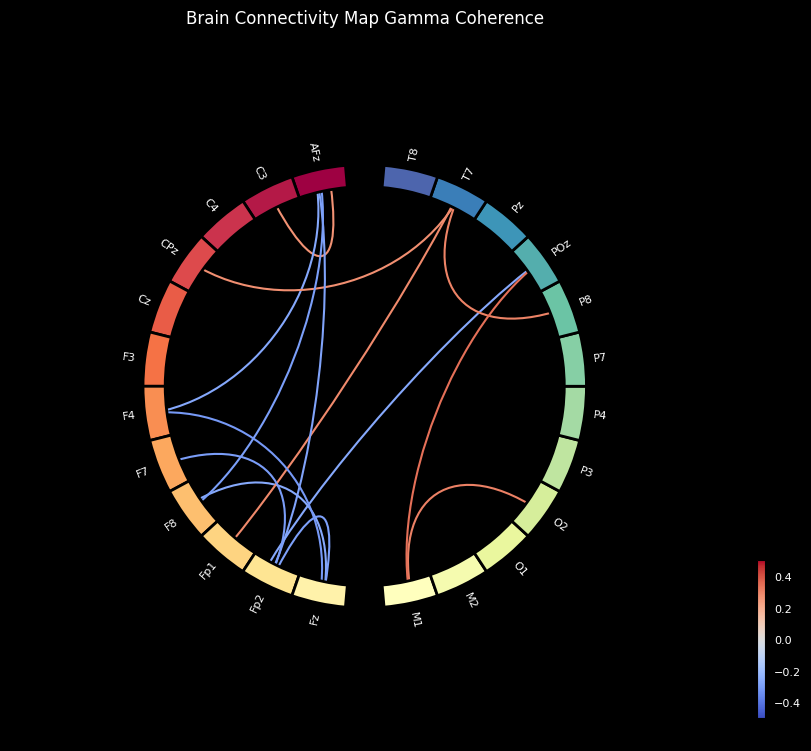

In [48]:
connectivityCircle(correlation_df_delta_coherence, "Delta")
connectivityCircle(correlation_df_theta_coherence,"Theta")
connectivityCircle(correlation_df_alpha_coherence,"Alpha")
connectivityCircle(correlation_df_beta_coherence,"Beta")
connectivityCircle(correlation_df_gamma_coherence,"Gamma")

## Connectivity Map Analysis:

Let's talk about the connectivity map for each brainwave!!

#### Delta:

Delta had the most features with significant correlation(18) and showed a good amount of widespread coherence pairs throughout the brain. Most of the the correlations were negative correlations which means that there was a lot of desynchronization in the delta bandpowers that carried meaningful information pertaining to stress. 

Looking at the map, there seems to be a lot of connections between the occipital regions and electrodes located in the back of the head with those in the frontal region of the skull. In the bandpower section of the analysis, we saw that the frontal region and occipital region were the most selected features and this might be related to the large amount of coherence features that show correlations between those two regions.


#### Theta:

Theta had fewer features(8) and also had mostly negative correlations. Once again, we see a lot of connections in between the occiputal regions and the frontal regions of the skull just like Delta. When looking at the bandpower data, this makes sense as the only features selected for bandpower were occiptal and parietal, both of which are located in the back of the head and implicated in the connectivity map.

#### Alpha:

Alpha had by far the fewest features selected(2). I think that it is safe to say that according to the correlation analysis, Alpha is very unimportant when it comes to stress. There were no Alpha features selected in the bandpower section and there are only 2 that have been selected for coherence.

#### Beta:

Beta had a good amount of chosen features with 12 chosen and actually saw more positive correlations as compared to the other respective brainwaves. In beta most of the connectivity patterns within the frontal lobe itself, which contrasts Delta and Theta.

#### Gamma:

Gamma had the second most features selected at 18 and has a strikingly similar connectivity map as the one for Beta. I guess this is to be presumed as they are both very high frequency bands.
Thus, like Beta, Gamma had a lot of intra frontal lobe connectivity patterns but also had quite a few connectivity patterns with the frontal and temporal lobe.


## EDA 1 Conclusion:


Our bandpower correlation analysis revealed that Delta and Gamma bandpowers are the most critical in decoding stress from EEG data, with significant features distributed across the brain, particularly in the frontal and occipital regions. The coherence correlation analysis further supported these findings, highlighting the dynamic synchronization patterns in these areas. Alpha bandpower, on the other hand, appears to be minimally related to stress, as evidenced by its lack of significant features in both bandpower and coherence analyses.

# EDA 2

Now lets try and use a different method of feature importance selection.

Recursive Feature Elimination (RFE) is a feature selection technique commonly used in machine learning to identify the most relevant features for a given model. RFE works by recursively fitting a model and removing the least important features until a specified number of features is reached. RFE requires a machine learning model/framework to be used as an estimator. We know from previous studies that SVM often give good results with EEG data and so I will be using it with RFE and figuring out the top features that are selected.

In [29]:
#Split up the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X_dfs, Y_dfs, test_size=0.3, random_state=42)

RFE with SVM

In [50]:
# Step 2: RFE with Linear SVM
svc = SVC(kernel="linear")
rfe_svm = RFE(estimator=svc, n_features_to_select=50, step=1)
rfe_svm.fit(X_train, y_train)
svm_rfe_features = X_dfs.columns[rfe_svm.support_]

In [51]:
svm_rfe_features

Index(['delta_Fp1-Pz', 'delta_Fp2-F8', 'delta_F4-P7', 'delta_C3-CPz',
       'delta_C4-O2', 'delta_C4-F7', 'delta_C4-POz', 'delta_P3-M1',
       'delta_P3-POz', 'delta_P4-O1', 'delta_T8-P8', 'delta_T8-AFz',
       'theta_Fp1-P3', 'theta_Fp2-F3', 'theta_F4-Pz', 'theta_F4-AFz',
       'theta_C4-Cz', 'theta_C4-M2', 'theta_F7-T8', 'theta_F7-CPz',
       'theta_Pz-M2', 'theta_M2-CPz', 'alpha_Fp1-POz', 'alpha_Fp2-O1',
       'alpha_F3-C3', 'alpha_F3-Pz', 'alpha_F3-M1', 'alpha_O1-P7',
       ' beta_Fp2-CPz', ' beta_C4-M2', ' beta_P3-P4', ' beta_O2-T7',
       ' beta_T8-M2', 'gamma_Fp1-T7', 'gamma_Fp2-O2', 'gamma_C4-F8',
       'gamma_C4-T8', 'gamma_C4-M2', 'gamma_P3-POz', 'gamma_P4-P8',
       'gamma_O1-O2', 'gamma_O1-F7', 'gamma_O1-T8', 'gamma_O1-M1',
       'gamma_O1-POz', 'gamma_F7-POz', 'gamma_T7-P7', 'gamma_Fz-M1',
       'gamma_Pz-AFz', 'gamma_M1-AFz'],
      dtype='object')

Quite surprisingly, we see that only coherence features have been selected and not a single bandpower feature shows up in the top 50 most important features selected by RFE. It is hard to speculate what the reasons for this can be but from previous knowledge I would assume that since high acute stress causes brainwide desynchronization and coherence offers measure of brain desynchronization it contributes heavily to the SVM's accuracy and so RFE decides to keep it as a feature.

In [8]:
all_electrodes= ['AFz', 'C3', 'C4', 'CPz', 'Cz', 'F3', 'F4', 'F7', 'F8',
 'Fp1', 'Fp2', 'Fz', 'M1', 'M2', 'O1', 'O2', 'P3', 'P4',
 'P7', 'P8', 'POz', 'Pz', 'T7', 'T8']

coherence_pairs_delta = [
    'delta_Fp1-Pz', 'delta_Fp2-F8', 'delta_F4-P7', 'delta_C3-CPz',
    'delta_C4-O2', 'delta_C4-F7', 'delta_C4-POz', 'delta_P3-M1',
    'delta_P3-POz', 'delta_P4-O1', 'delta_T8-P8', 'delta_T8-AFz'
]
coherence_pairs_theta = [
    'theta_Fp1-P3', 'theta_Fp2-F3', 'theta_F4-Pz', 'theta_F4-AFz',
       'theta_C4-Cz', 'theta_C4-M2', 'theta_F7-T8', 'theta_F7-CPz',
       'theta_Pz-M2', 'theta_M2-CPz'
]
coherence_pairs_alpha = [
    'alpha_Fp1-POz', 'alpha_Fp2-O1',
       'alpha_F3-C3', 'alpha_F3-Pz', 'alpha_F3-M1', 'alpha_O1-P7'
]
coherence_pairs_beta = [
    ' beta_Fp2-CPz', ' beta_C4-M2', ' beta_P3-P4', ' beta_O2-T7',
       ' beta_T8-M2'
]
coherence_pairs_gamma = [
    'gamma_Fp1-T7', 'gamma_Fp2-O2', 'gamma_C4-F8',
       'gamma_C4-T8', 'gamma_C4-M2', 'gamma_P3-POz', 'gamma_P4-P8',
       'gamma_O1-O2', 'gamma_O1-F7', 'gamma_O1-T8', 'gamma_O1-M1',
       'gamma_O1-POz', 'gamma_F7-POz', 'gamma_T7-P7', 'gamma_Fz-M1',
       'gamma_Pz-AFz', 'gamma_M1-AFz'
]

def connectivityCircleRFE(df, bp):
    n = len(all_electrodes)
    con_matrix = np.zeros((n, n))

    electrode_indices = {electrode: idx for idx, electrode in enumerate(all_electrodes)}

    for pair in df:
        ch1, ch2 = pair.split('_')[1].split('-')
        idx1 = electrode_indices[ch1]
        idx2 = electrode_indices[ch2]
        con_matrix[idx1, idx2] = 1
        con_matrix[idx2, idx1] = 1  

    # Set all zero values in the matrix to np.nan
    con_matrix[con_matrix == 0] = np.nan

    # Create the standard 10-20 montage
    montage = mne.channels.make_standard_montage('standard_1020')

    standard_pos = montage.get_positions()['ch_pos']

    filtered_pos = {elec: standard_pos[elec] for elec in all_electrodes if elec in standard_pos}

    node_order = list(filtered_pos.keys())
    node_angles = mne.viz.circular_layout(node_order, node_order, start_pos=90,
                                        group_boundaries=[0, len(node_order) // 2])

    # Plot connectivity circle, ignoring np.nan values
    fig, ax = plot_connectivity_circle(con_matrix, node_names=node_order, n_lines=None, 
                                    node_angles=node_angles, title='Brain Connectivity Map'+ ' ' + bp + ' Coherence', 
                                    colormap='coolwarm', vmin=0, vmax=1, colorbar=False)

    plt.show()


Lets create connectivity plots for these selected features like we did for the correlation analysis!!

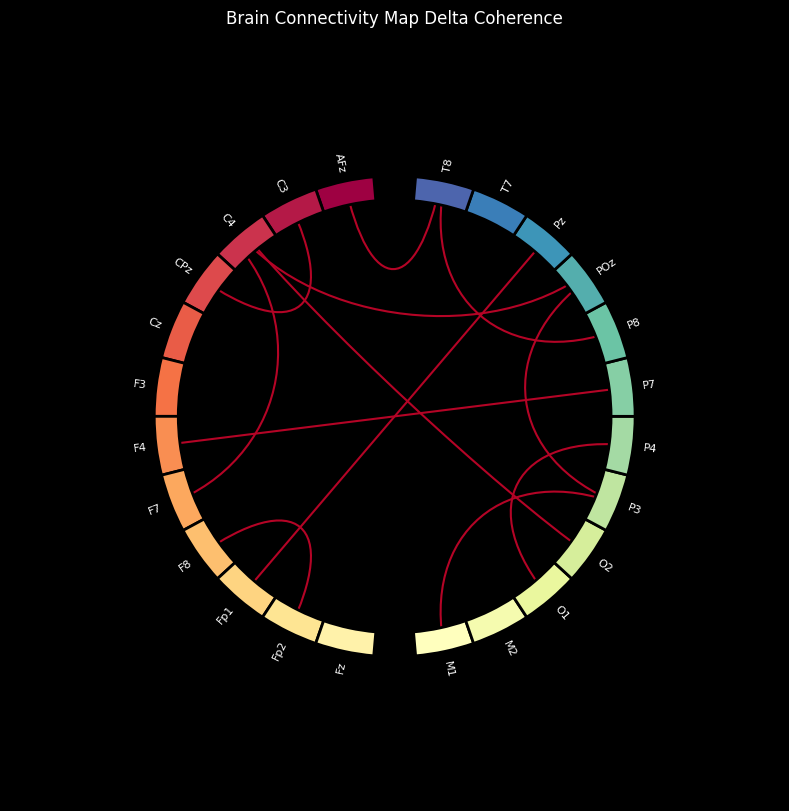

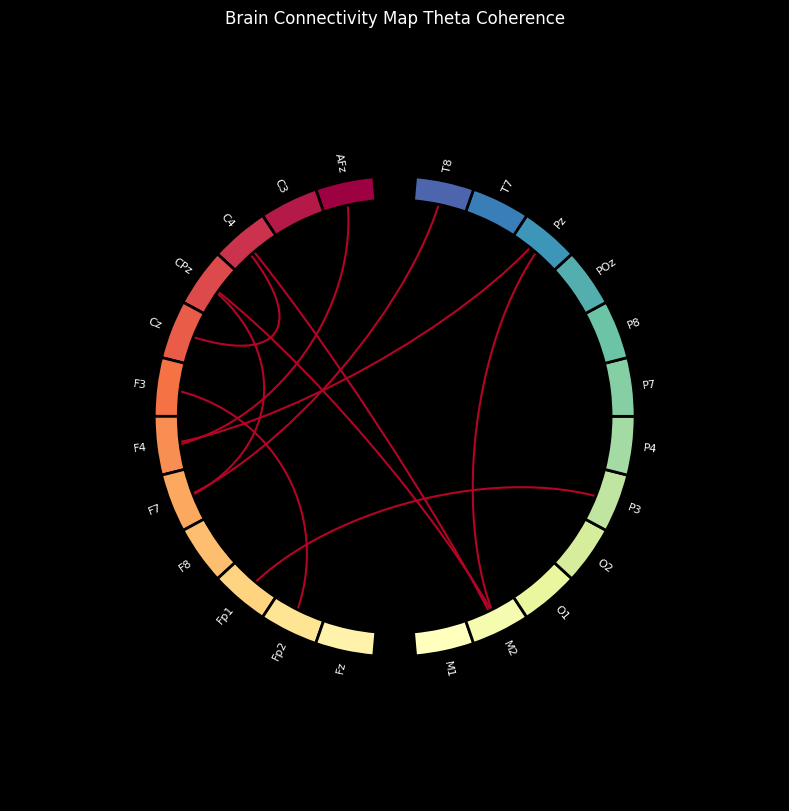

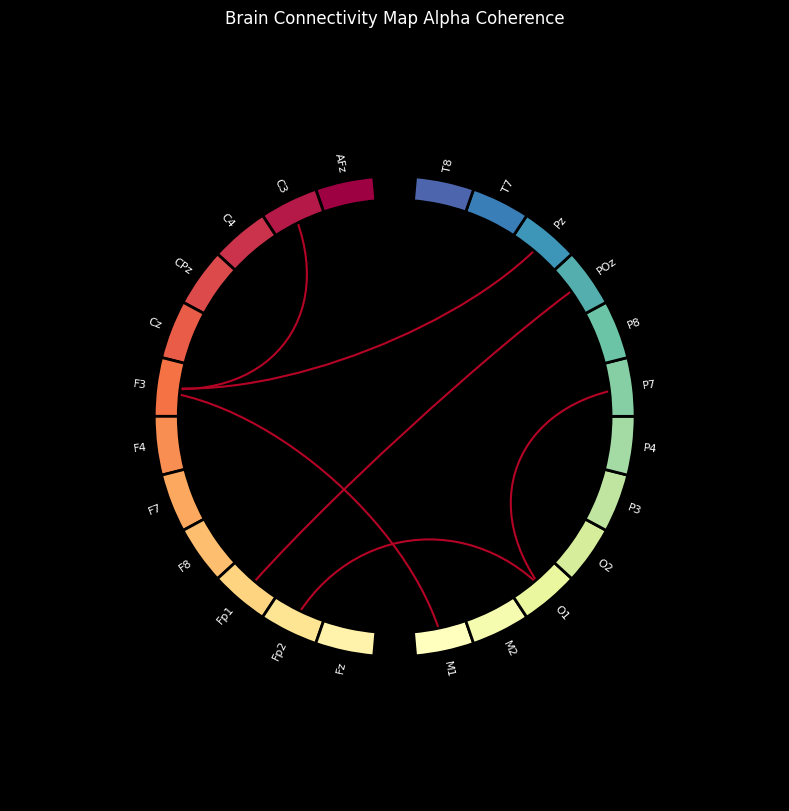

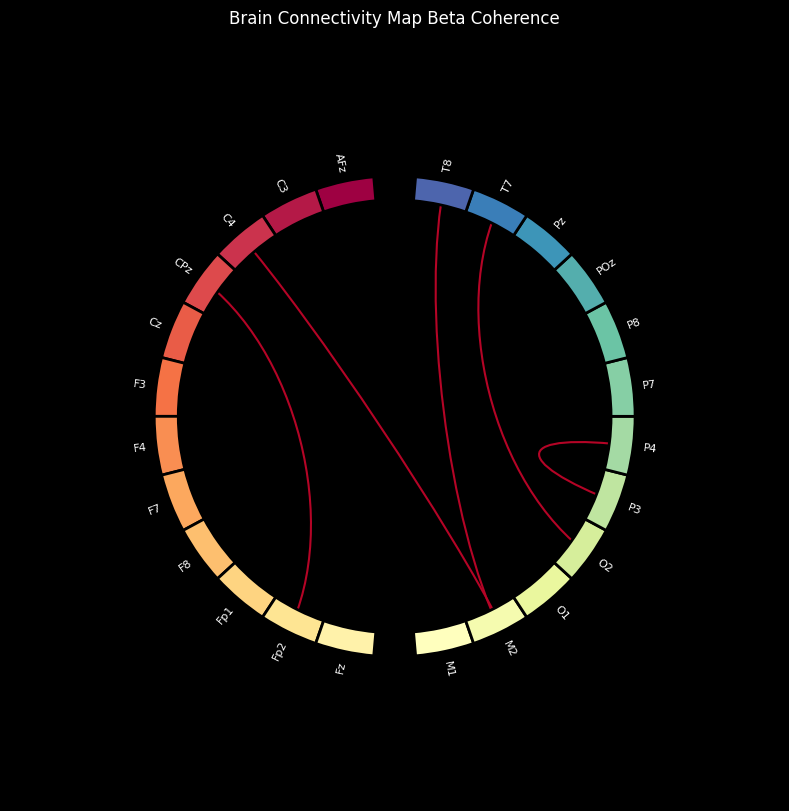

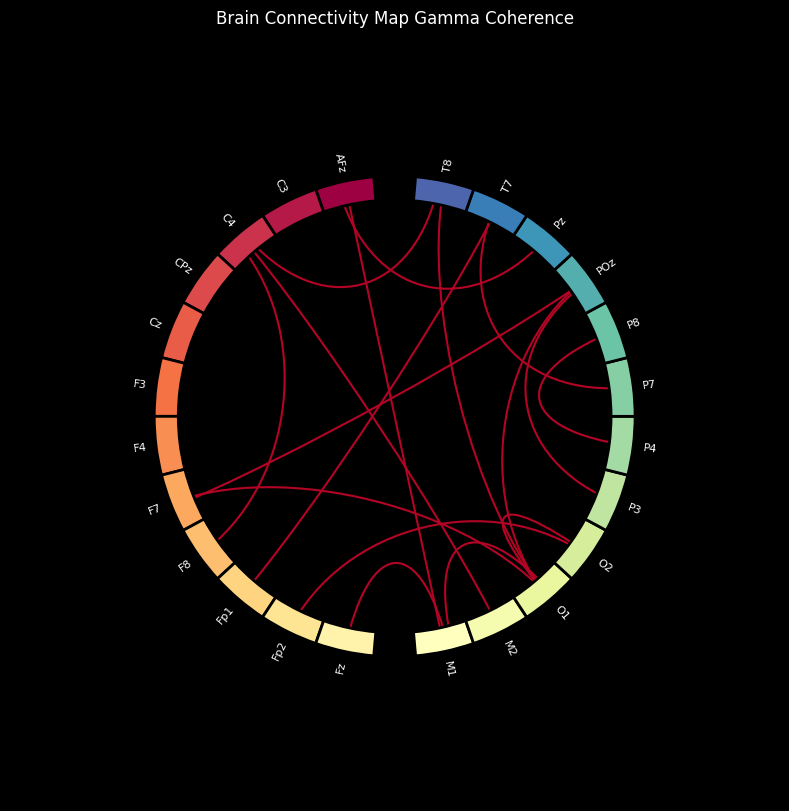

In [10]:
connectivityCircleRFE(coherence_pairs_delta, "Delta")
connectivityCircleRFE(coherence_pairs_theta,"Theta")
connectivityCircleRFE(coherence_pairs_alpha,"Alpha")
connectivityCircleRFE(coherence_pairs_beta,"Beta")
connectivityCircleRFE(coherence_pairs_gamma,"Gamma")

## Connectivity Map Analysis:

Let's talk about the connectivity map for each brainwave!!

#### Delta:

Out of all features, Delta had 12 selected which is 24% of the 50 total RFE features. From the map we can see that there was pretty much a brain wide distribution of connections and there wasn't really a strong grouping of connections in one area or another.

When compared to the connectivity circle that was made with the correlation anaylsis we definetely see a smaller concentration of connections between the frontal and occipital regions.

#### Theta:

Theta had 10 features selected which accounts for 20% of the 50 total RFE features. Theta had a slight grouping of connections focused in the frontal and central regions of the skull. 

This is very different from the connectivity circle that was made with the correlation anaylsis as that one focused almost all its connections within the occipital region and frontal region.


#### Alpha:

Alpha had very few features selected with only 6 features being chosen by RFE. This accounts for 0.12% of the 50 total features chosen. This is in line with the connectivity circle that was made with the correlation anaylsis and further proves the point that alpha is not a significant factor in decoding stess in our data context.

#### Beta:

Beta actually had very few features selected, with only 5 features being chosen. This accounts for only 10% of the 50 total features. Compared to the connectivity circle that was made with the correlation anaylsis, this is a big dropoff in the amount of beta coherence features that are chosen. The reason for this isn't clear.

#### Gamma:

Gamma unsurprisingly had by far the most features with 17 features selected by RFE, accounting for a whopping 34% of the 50 total features chosen. There does actually seem to be a lot of connections between the occipital and frontal regions, paralleling the connectivity circle that was made with the correlation anaylsis. 

The importance of the Gamma bandpower in the bandpower correlation anaylsis, the coherence correlation anaylysis and this RFE chosen features anaylsis adds a lot of evidence towards the importance of Gamma for stress decoding in this data context.


# Classifier

Test performance of SVM without any feature selection:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_dfs, Y_dfs, test_size=0.3, random_state=41)

In [38]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model Accuracy: {accuracy:.4f}')


SVM Model Accuracy: 0.6963


Well that accuracy is not too bad but lets see if we can make it better. There are 1500 features being fed into the SVM, lets try to use an RFE to thin down that feature count to something around 200 features.

In [30]:
# Step 2: RFE with Linear SVM
svc = SVC(kernel="linear")
rfe_svm_2 = RFE(estimator=svc, n_features_to_select=200, step=1)
rfe_svm_2.fit(X_train, y_train)
svm_rfe_features_2 = X_dfs.columns[rfe_svm_2.support_]
X_dfs_RFE = X_dfs[svm_rfe_features_2]


Accuracy scores for each fold: [0.61373391 0.43103448 0.48706897 0.68965517 0.72413793]
Mean accuracy across all folds: 0.5891260914607075
Standard deviation of the accuracy across all folds: 0.11344465712929912


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_dfs_RFE, Y_dfs, test_size=0.3, random_state=43)

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model Accuracy: {accuracy:.4f}')

SVM Model Accuracy: 0.8166


Much better!! ~82% is a good accuracy especially for EEG data.

I do not know if this it the highest accuracy that is possible and it might be possible to achieve higher depending on different feature selection methods etc.. I would have ran RFECV to try and find the optimal feature count to include but that takes an insane amount of time to run locally.

# Ethics & Privacy

The data in the project was reviewed by an ethical review board, which evaluated the methods and findings of the data collection for ethical soundness and privacy compliance. While our project provides valuable insights into the relationship between EEG activity and stress during laparoscopic training, we cannot make generalized conclusions due to the anonymity of our population information. Without demographic details such as age, gender, or race, it's challenging to assess the representativeness of our sample. This limitation means our findings may not be broadly applicable to other populations or settings. Future research should consider including more diverse and well-documented participant demographics to enhance the generalizability of the results.

# Discussion and Conclusion

In this study we probed neuronal dynamics in a stressful environment, specifically during the execution of laparoscopic training exercises. Our investigation centered on the subjective experience of stress and established neural markers of cognitive exertion, namely EEG bandpower and pairwise channel coherence. Additionally, we harnessed the EEG-derived features to inform the training of various machine learning algorithms, with the aim of predicting perceived stress levels based on neural activity.

Our findings underscore a pronounced correlation between stress and EEG bandpower within the delta and gamma frequency domains. Notably, we observed consistent correlations between bandpower and self-reported stress across the entire scalp, indicating a widespread rather than localized neural response. Increases in gamma activity have been linked to states of heightened alertness and anxiety, reflecting the brain’s response to imminent challenges(Alonso 2015,Lotfan 2019,PalaciosGarcia 2016, Vanhollebeke 2022). This phenomenon suggests that stress may modulate performance by reallocating attentional resources, with a surge in gamma-band activity potentially acting as a counterbalance to sustain task engagement. Gamma oscillations are typically linked to advanced information processing and high-level cognitive operations. While some studies did not establish a steadfast link between gamma bandpower and stress (Ehrhardt 2022,Vanhollebeke 2022,Vanhollebeke 2023) other research shows that stress can indeed influence gamma activity (Korkmaz 2024,Song 2024) for instance with acute psychosocial stressors leading to an uptick in prefrontal gamma power cite(Minguillon2016). Nonetheless, the specific direction and magnitude of gamma power alterations may hinge on the nature of the stressor and the individual’s response to it cite(Katmah2021). Such variations imply that shifts in gamma activity may be reflective of personal coping strategies and the efficacy of interventions aimed at stress mitigation. In our study, we deliberately sought to assess neural responses to stress within a medical context, engaging novice participants in surgical training activities. Our findings indicate that EEG bandpower in the delta and gamma frequency range can serve as a promising neuronal index for acute stress experience in this environment.

Our analysis of pairwise channel coherence revealed intriguing patterns related to stress. We identified two distinct clusters of electrodes: Within the occipital region, we observed pairwise coherence in the theta and delta frequency bands that consistently correlated with perceived stress levels. In a separate fronto-temporal cluster, we found that pairwise coherence in the gamma and beta band was related to stress levels. The functional connectivity between these electrodes reflects the degree to which neuronal populations synchronize their activity (Bastos 2016, Bowyer 2016). Recent research has demonstrated a notable elevation in beta coherence levels when stress is elicited through stress inducing tasks (Alonso 2015,Subhani 2017), or sleep deprivation (Alonso 2015) as well as an increase in gamma coherence associated with an increase in stress (Xia2018). These findings underscore that EEG-derived metrics can provide valuable indices for stress detection.

The most clear takeaway from this research analysis was the lack of importance the alpha band carries in both band power and coherence settings. This lack of importance was apparent in both the correlation analysis we did as well as the RFE importance analysis. It is important to keep in mind however, that we had a relatively small data set when put in the context of EEG and the finding that the alpha band is not important can only really be extended to our specific data context.

All 4 of the other band's showed importance. However, Gamma was by far the most important across both the correlation analysis and the RFE importance analysis. Delta also showed a considerable amount of importance and was especially an important band for coherence features. Beta and Theta were picked less in all 3 analysis but showed more localized groupings of significant features, which is something that we can further explore with existing literature about stress manifestation in the brain.


### Machine Learning:

The machine learning and classification aspect of this project was not the main focal point. However, I do want to talk about it as it is the main use case of EEG data and is something that I will keep exploring when time allows.

Leveraging these significant EEG-based features we found for machine learning (ML) classifiers presents a compelling avenue for applications in the realm of stress detection. These classifiers harness the rich, multidimensional data provided by EEG to discern patterns indicative of stress. Stress classifiers based on EEG data have been widely explored and consistently demonstrated the effectiveness of ML-classifiers in stress classification (Katmah 2021, Al-Shargie 2017, Al-Shargie 2018, Ehrhardt 2017, Kulkarni 2020, Subhani2017, Malviya 2022, Xia 2018). Most existing classifiers in this context employ Support Vector Machines (SVM) and rely on power spectral density (Xia 2018, Subhani 2017, Movahed 2021, Al-Shargie 2018, Darzi 2019). Researchers have achieved remarkable accuracy using a hybrid deep learning model that combines Convolutional Neural Networks (CNN) and Bidirectional Long Short-Term Memory (BLSTM) networks. In a highly controlled environment, this model achieved an accuracy rate of 99.20% for stress level classification during mental arithmetic tasks (Malviya 2022). Another study successfully combined power spectral density and pairwise channel coherence, achieving an accuracy of 69.25% using Linear Discriminant Analysis (LDA)  and an accuracy of 92.4% using SVM. By reducing the feature space and controlling for over-sampling, they further improved the model accuracy to 94.8%. In a less controlled classroom setting, researchers achieved 79.35% accuracy using LDA and 83.70% accuracy with a neural network based solely on power spectral density (Chang2022). Our results in the less controlled surgical training environment closely align with those obtained in the non-controlled classroom setting. Using both power spectral density and pairwise channel coherence, we achieved a similar classification accuracy. Interestingly, all three of our models yielded comparable results between 76% and 79%, demonstrating stability across models. The consistency of our outcomes coupled with the alignment to the results obtained in the classroom setting (Chang 2022) suggests that the approx. 80% accuracy achieved through the application of EEG power spectral density and pairwise channel coherence metrics for binary stress classification may represent a reliable performance benchmark across diverse non-laboratory contexts.




# Team Contributions



Data acquisition: Parv

Data wrangling Parv

Ideas everyone

Leadership Tiffany

Organization Tiffany

Research Parv

Statistical/analytical Michael 

Programming everyone 

Writing Chirag

Video everyone 

Visualizations Derrick


# References


Arora S., Sevdalis N., Nestel D., Woloshynowych M., Darzi A., Kneebone R. (2010). The impact of stress on surgical performance: a systematic review of the literature. Surgery. 147(3):318–30, 330.e1.

Chang CY. Brain-computer Interfaces for Online Mental Stress Monitoring in the Real World [Doctoral dissertation]. UC San Diego; 2022.
Chrouser K.L., Xu J., Hallbeck S., Weinger M.B., Partin M.R. (2018). The influence of stress responses on surgical performance and outcomes: Literature review and the development of the surgical stress effects (SSE) framework. Am J Surg. 216(3):573–584.

Delorme, A. & Makeig, S. (2004). EEGLAB: an open-source toolbox for analysis of single-trial EEG dynamics, Journal of Neuroscience Methods 134:9-21.
Duru, D. G., Duru, A. D., Barkana, D. E., Sanli, O., & Ozkan, M. (2013). Assessment of surgeon's stress level and alertness using EEG during laparoscopic simple nephrectomy. In 2013 6th International IEEE/EMBS Conference on Neural Engineering (NER) (pp. 452-455). IEEE.

Katmah, R., Al-Shargie, F., Tariq, U., Babiloni, F., Al-Mughairbi, F., & Al-Nashash, H. (2021). A review on mental stress assessment methods using EEG signals. Sensors, 21(15), 5043.

Ko L.W., Komarov O., Hairston W.D., Jung T.P., Lin C.T. (2017). Sustained attention in real classroom settings: an EEG study. Front Hum Neurosci. 31;11:388.
Lysiak, A. (2021). Measuring Stress Response via the EEG-A Review. Control, Computer Engineering and Neuroscience: Proceedings of IC Brain Computer Interface 2021, 119-128.

Maddox, M. M., Lopez, A., Mandava, S. H., Boonjindasup, A., Viriyasiripong, S., Silberstein, J. L., & Lee, B. R. (2015). Electroencephalographic monitoring of brain wave activity during laparoscopic surgical simulation to measure surgeon concentration and stress: Can the student become the master?. Journal of endourology, 29(12), 1329-1333.

Maimon, N. B., Bez, M., Drobot, D., Molcho, L., Intrator, N., Kakiashvilli, E., & Bickel, A. (2022). Continuous monitoring of mental load during virtual simulator training for laparoscopic surgery reflects laparoscopic dexterity: A comparative study using a novel wireless device. Frontiers in Neuroscience, 15, 694010.

Manabe, T., Rahul, F. N. U., Fu, Y., Intes, X., Schwaitzberg, S. D., De, S., ... & Dutta, A. (2023). EEG topography preserving convolutional neural network approach to assess skill levels during laparoscopic surgical training.

Panicker, S. S., & Gayathri, P. (2019). A survey of machine learning techniques in physiology based mental stress detection systems. Biocybernetics and Biomedical Engineering, 39(2), 444-469.

Peters, J. H., Fried, G. M., Swanstrom, L. L., Soper, N. J., Sillin, L. F., Schirmer, B., ... & Sages FLS Committee. (2004). Development and validation of a comprehensive program of education and assessment of the basic fundamentals of laparoscopic surgery. Surgery, 135(1), 21-27.

Pérez, Y., Borboa-Gastelum, R., Alonso-Valerdi, L. M., Ibarra-Zárate, D. I., Flores-Villalba, E. A., & Rodríguez-González, C. A. (2021). Detection of Vigil and Fatigue States During Laparoscopic Tasks Based on EEG Patterns: Towards Neuroergonomics in Medical Training. Journal of Medical and Biological Engineering, 41, 904-913.

Pion-Tonachini, L., Kreutz-Delgado, K., Makeig, S. (2019). ICLabel: An automated electroencephalographic independent component classifier, dataset, and website. NeuroImage 198:181-197.

Tjønnås, M.S., Guzmán-García, C., Sánchez-González, P. et al. (2022). Stress in surgical educational environments: a systematic review. BMC Med Educ 22, 791. https://doi.org/10.1186/s12909-022-03841-6.

Zhang, S., Tu, M., Yan, Y., Zhuang, Y., Ge, L., & Wei, G. (2022). Detecting Depression, Anxiety and Mental Stress in One Sequential Model with Multi-task Learning. In International Conference on Human-Computer Interaction (pp. 191-200). Cham: Springer Nature Switzerland.
